Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [2]:
wine = pd.read_csv('/content/wine.csv')
wine.head()

Type  Alcohol  Malic   Ash  ...  Color   Hue  Dilution  Proline
0     1    14.23   1.71  2.43  ...   5.64  1.04      3.92     1065
1     1    13.20   1.78  2.14  ...   4.38  1.05      3.40     1050
2     1    13.16   2.36  2.67  ...   5.68  1.03      3.17     1185
3     1    14.37   1.95  2.50  ...   7.80  0.86      3.45     1480
4     1    13.24   2.59  2.87  ...   4.32  1.04      2.93      735

[5 rows x 14 columns]

In [3]:
# Considering only required data 
wine.data = wine.iloc[:,1:]
wine.data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Alcohol  Malic   Ash  Alcalinity  ...  Color   Hue  Dilution  Proline
0    14.23   1.71  2.43        15.6  ...   5.64  1.04      3.92     1065
1    13.20   1.78  2.14        11.2  ...   4.38  1.05      3.40     1050
2    13.16   2.36  2.67        18.6  ...   5.68  1.03      3.17     1185
3    14.37   1.95  2.50        16.8  ...   7.80  0.86      3.45     1480
4    13.24   2.59  2.87        21.0  ...   4.32  1.04      2.93      735

[5 rows x 13 columns]

In [4]:
# Converting into numpy array
WINE = wine.data.values
WINE

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
# Normalizing the numerical data 
wine_normal = scale(wine)
wine_normal

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [6]:
pca = PCA()
pca_values = pca.fit_transform(wine_normal)

In [7]:
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [8]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [9]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

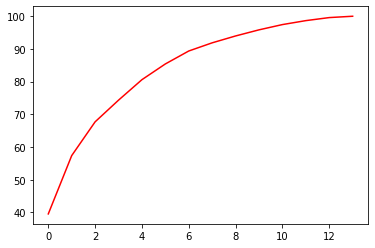

In [10]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

([<matplotlib.axis.XTick at 0x7fc51ac99350>,
 <a list of 14 Text major ticklabel objects>)

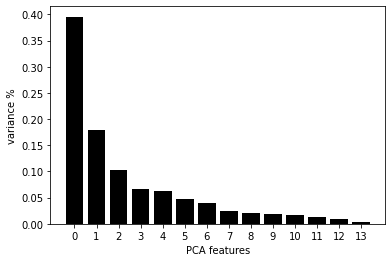

In [11]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [38]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])],axis = 1)

In [39]:
finalDf

pc1       pc2       pc3
0   -3.522934 -1.453098 -0.164795
1   -2.528858  0.330019 -2.026707
2   -2.785029 -1.036936  0.983238
3   -3.922588 -2.768210 -0.174968
4   -1.407511 -0.867773  2.025829
..        ...       ...       ...
173  3.627996 -2.206617 -0.343668
174  2.942729 -1.752263  0.207480
175  3.027272 -2.756040 -0.940803
176  2.755222 -2.293784 -0.550474
177  3.496336 -2.760608  1.013151

[178 rows x 3 columns]

# Hierachical clustering

In [40]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

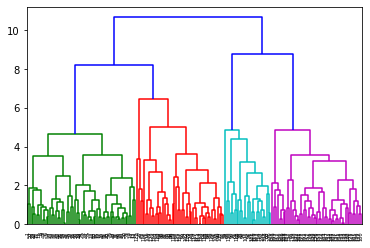

In [41]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(finalDf, method='complete'))

In [42]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [43]:
# save clusters for chart
y_hc = hc.fit_predict(finalDf)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [44]:
finalDf['h_clusterid'] = Clusters

In [45]:
finalDf

pc1       pc2       pc3  h_clusterid
0   -3.522934 -1.453098 -0.164795            0
1   -2.528858  0.330019 -2.026707            0
2   -2.785029 -1.036936  0.983238            0
3   -3.922588 -2.768210 -0.174968            0
4   -1.407511 -0.867773  2.025829            0
..        ...       ...       ...          ...
173  3.627996 -2.206617 -0.343668            1
174  2.942729 -1.752263  0.207480            1
175  3.027272 -2.756040 -0.940803            1
176  2.755222 -2.293784 -0.550474            1
177  3.496336 -2.760608  1.013151            1

[178 rows x 4 columns]

# K_means Clustering

In [26]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

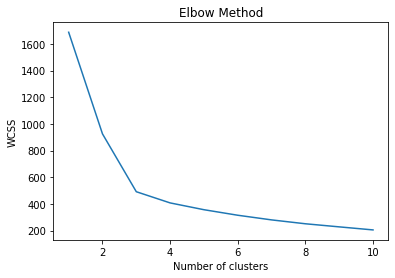

In [48]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(finalDf.iloc[:,0:3])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=30) #as per elbow chart we have taken 3 numbers of clusters
clusters_new.fit(finalDf.iloc[:,0:3])
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [51]:
#Assign clusters to the data set
finalDf['clusterid_new'] = clusters_new.labels_

In [52]:
finalDf

pc1       pc2       pc3  h_clusterid  clusterid_new
0   -3.522934 -1.453098 -0.164795            0              1
1   -2.528858  0.330019 -2.026707            0              1
2   -2.785029 -1.036936  0.983238            0              1
3   -3.922588 -2.768210 -0.174968            0              1
4   -1.407511 -0.867773  2.025829            0              1
..        ...       ...       ...          ...            ...
173  3.627996 -2.206617 -0.343668            1              0
174  2.942729 -1.752263  0.207480            1              0
175  3.027272 -2.756040 -0.940803            1              0
176  2.755222 -2.293784 -0.550474            1              0
177  3.496336 -2.760608  1.013151            1              0

[178 rows x 5 columns]

In [55]:
wine_new= pd.concat([wine,finalDf],axis=1)

In [56]:
wine_new

Type  Alcohol  Malic   Ash  ...       pc2       pc3  h_clusterid  clusterid_new
0       1    14.23   1.71  2.43  ... -1.453098 -0.164795            0              1
1       1    13.20   1.78  2.14  ...  0.330019 -2.026707            0              1
2       1    13.16   2.36  2.67  ... -1.036936  0.983238            0              1
3       1    14.37   1.95  2.50  ... -2.768210 -0.174968            0              1
4       1    13.24   2.59  2.87  ... -0.867773  2.025829            0              1
..    ...      ...    ...   ...  ...       ...       ...          ...            ...
173     3    13.71   5.65  2.45  ... -2.206617 -0.343668            1              0
174     3    13.40   3.91  2.48  ... -1.752263  0.207480            1              0
175     3    13.27   4.28  2.26  ... -2.756040 -0.940803            1              0
176     3    13.17   2.59  2.37  ... -2.293784 -0.550474            1              0
177     3    14.13   4.10  2.74  ... -2.760608  1.013151            1              0

[178 rows x 19 columns]

In original dataset we have 3 types means 3 cluster. As per K_Means clustering we got 3 for the dataset as well.